# Churn Model

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('telco_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [5]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df.totalcharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [6]:
string_columns = df.dtypes[df.dtypes=='object'].index

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df.totalcharges = df.totalcharges.fillna(0)

In [8]:
df.isna().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [9]:
#convert churn to [0,1]

df['churn'] = (df['churn'] == 'yes').astype(int)

In [10]:
df.churn.value_counts()

churn
0    5174
1    1869
Name: count, dtype: int64

In [11]:
# Set up Validation FW

from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state = 1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state = 1)

len(df), (len(df_train) + len(df_test) + len(df_val))
len(df_full_train), (len(df_train) + len(df_val))

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [12]:
#Target Variable = Churn

y_train = df_train['churn']
y_test = df_test['churn']
y_val = df_test['churn']

In [13]:
del df_train['churn']
del df_test['churn']
del df_val['churn']

### Churn Rate Diff / Risk Ratio

In [15]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [16]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int64
dtype: object

In [17]:
categorical = ['gender', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 
        'techsupport','streamingtv', 'streamingmovies', 'contract', 
        'paperlessbilling', 'paymentmethod', 'seniorcitizen'
]

numerical = ['tenure', 'monthlycharges', 'totalcharges',]

In [18]:
df_full_train[categorical].nunique()

gender              2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
seniorcitizen       2
dtype: int64

In [19]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [20]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [21]:
#scan through churn rates

for col in categorical:
    print(col, df_full_train[col].unique())

gender ['male' 'female']
partner ['yes' 'no']
dependents ['yes' 'no']
phoneservice ['yes' 'no']
multiplelines ['no' 'yes' 'no_phone_service']
internetservice ['no' 'dsl' 'fiber_optic']
onlinesecurity ['no_internet_service' 'yes' 'no']
onlinebackup ['no_internet_service' 'yes' 'no']
deviceprotection ['no_internet_service' 'yes' 'no']
techsupport ['no_internet_service' 'yes' 'no']
streamingtv ['no_internet_service' 'no' 'yes']
streamingmovies ['no_internet_service' 'yes' 'no']
contract ['two_year' 'one_year' 'month-to-month']
paperlessbilling ['no' 'yes']
paymentmethod ['mailed_check' 'credit_card_(automatic)' 'bank_transfer_(automatic)'
 'electronic_check']
seniorcitizen [0 1]


In [22]:
male_churn_rate = df_full_train[df_full_train.gender =='male'].churn.mean()
male_churn_rate

0.2632135306553911

In [23]:
female_churn_rate = df_full_train[df_full_train.gender == 'female'].churn.mean()
female_churn_rate

0.27682403433476394

In [24]:
global_churn_rate

0.26996805111821087

In [25]:
male_risk_ratio = male_churn_rate / global_churn_rate
female_risk_ratio = female_churn_rate / global_churn_rate

In [26]:
male_risk_ratio, female_risk_ratio

(0.9749802969838747, 1.0253955354648652)

In [27]:
from IPython.display import display

In [28]:
for col in categorical:
    df_group = df_full_train.groupby(col).churn.agg(['mean', 'count']).copy()
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk_ratio'] = df_group['mean'] / global_churn_rate
    display(df_group)
    

,mean,count,diff,risk_ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk_ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk_ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk_ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk_ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


,mean,count,diff,risk_ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk_ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk_ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk_ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk_ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk_ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk_ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk_ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk_ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


,mean,count,diff,risk_ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


In [29]:
#Feature Importance - Mutual Info score

from sklearn.metrics import mutual_info_score

In [30]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [31]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [32]:
for col in categorical:
    score = df_full_train[col]
    mi_score = mutual_info_churn_score(score)
    print(col, mi_score)

gender 0.0001174846211139946
partner 0.009967689095399745
dependents 0.012345815445534689
phoneservice 0.00022871269738296285
multiplelines 0.0008574478744731856
internetservice 0.055867945893496467
onlinesecurity 0.06308524972985574
onlinebackup 0.0469234640537918
deviceprotection 0.04345286925268559
techsupport 0.06103245991777444
streamingtv 0.03185333110086085
streamingmovies 0.03158089669519908
contract 0.0983203874041556
paperlessbilling 0.01758882715925275
paymentmethod 0.043210027531582915
seniorcitizen 0.009410216144208144


In [33]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

In [34]:
#Feature Correlation - Correlation

In [35]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [36]:
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [37]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

<Axes: xlabel='tenure', ylabel='Count'>

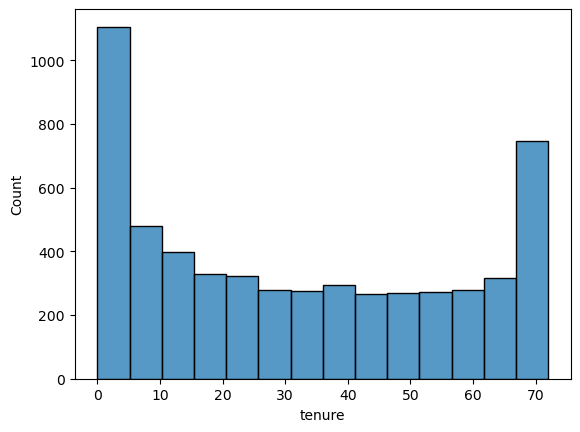

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.histplot(df_full_train.tenure)

In [39]:
df_full_train[df_full_train.tenure <= 10].churn.mean()

0.49401386263390046

In [40]:
df_full_train[(df_full_train.tenure > 10) & (df_full_train.tenure <= 40)].churn.mean()

0.26301518438177873

In [41]:
df_full_train[df_full_train.tenure > 40].churn.mean()

0.11438946890603723

In [42]:
## One Hot Encoding
from sklearn.feature_extraction import DictVectorizer

In [43]:
dv = DictVectorizer(sparse=False)

In [44]:
training_dicts = df_train[categorical + numerical].to_dict(orient='records')
training_dicts

[{'gender': 'female',
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'seniorcitizen': 0,
  'tenure': 72,
  'monthlycharges': 115.5,
  'totalcharges': 8425.15},
 {'gender': 'male',
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'month-to-month',
  'paperlessbilling': 'yes',
  'paymentmethod': 'electronic_check',
  'seniorcitizen': 0,
  'tenure': 10,
  'monthlycharges': 95.25,
  'totalcharges': 1021.55},
 {'gender

In [45]:
X_train = dv.fit_transform(training_dicts)

In [46]:
X_train.shape

(4225, 45)

In [47]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
val_dicts

[{'gender': 'male',
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'credit_card_(automatic)',
  'seniorcitizen': 0,
  'tenure': 71,
  'monthlycharges': 70.85,
  'totalcharges': 4973.4},
 {'gender': 'male',
  'partner': 'no',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'month-to-month',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'seniorcitizen': 0,
  

In [48]:
X_val = dv.fit_transform(val_dicts)
X_val

array([[0.0000e+00, 0.0000e+00, 1.0000e+00, ..., 1.0000e+00, 7.1000e+01,
        4.9734e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0750e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        2.0350e+01],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.0000e+00, 1.8000e+01,
        1.0581e+03],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        9.3300e+01],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 3.0000e+00,
        2.9285e+02]])

In [49]:
X_val.shape

(1409, 45)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
model.intercept_[0], model.coef_[0].round(3)

(-0.10829812861544427,
 array([ 0.472, -0.171, -0.407, -0.031, -0.076,  0.062, -0.09 , -0.079,
        -0.034, -0.073, -0.33 ,  0.313, -0.09 ,  0.004, -0.255,  0.141,
         0.006,  0.062, -0.09 , -0.079,  0.261, -0.09 , -0.278, -0.227,
         0.12 , -0.164,  0.057, -0.086, -0.031,  0.066, -0.057,  0.141,
        -0.248,  0.212, -0.118, -0.09 ,  0.1  , -0.069, -0.09 ,  0.052,
         0.208, -0.09 , -0.226, -0.07 ,  0.   ]))

In [53]:
model.predict_proba(X_train) #soft prediction, right column is positive, left is negative
y_pred = model.predict_proba(X_val)[:,1]

In [54]:
y_pred

array([0.00937688, 0.20636533, 0.21350024, ..., 0.14016521, 0.79757378,
       0.83465231])

In [55]:
churn_decision = (y_pred >= 0.5)

In [56]:
df_val[churn_decision].customerid #customers that match churn decision

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 313, dtype: object

In [57]:
(y_val == churn_decision).mean() #model accuracy

0.6472675656493967

In [58]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [59]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [60]:
df_pred

,probability,prediction,actual,correct
0,0.009377,0,0,True
1,0.206365,0,0,True
2,0.213500,0,0,True
3,0.544175,1,1,True
4,0.214825,0,0,True
...,...,...,...,...
1404,0.314914,0,1,False
1405,0.040401,0,0,True
1406,0.140165,0,0,True
1407,0.797574,1,0,False


### Train Model With Fewer Features (Smaller Subset)

In [62]:
small = ['contract', 'tenure', 'monthlycharges']

In [63]:
df_train[small]

,contract,tenure,monthlycharges
0,two_year,72,115.50
1,month-to-month,10,95.25
2,month-to-month,5,75.55
3,month-to-month,5,80.85
4,two_year,18,20.10
...,...,...,...
4220,one_year,52,80.85
4221,month-to-month,18,25.15
4222,month-to-month,2,90.00
4223,two_year,27,24.50


In [64]:
dv = DictVectorizer(sparse=False)

In [65]:
small_train_dicts = df_train[small].to_dict(orient='records')

In [66]:
X_small_train = dv.fit_transform(small_train_dicts)

In [67]:
small_val_dicts = df_val[small].to_dict(orient='records')

In [68]:
X_small_val = dv.fit_transform(small_val_dicts)

In [69]:
model_small = LogisticRegression()
model_small.fit(X_small_train, y_train)

LogisticRegression()

In [70]:
model_small.predict_proba(X_small_train) #soft prediction, right column is positive, left is negative
y_pred_small = model_small.predict_proba(X_small_val)[:,1]

In [71]:
y_pred_small

array([0.01715093, 0.27434516, 0.27216189, ..., 0.34500959, 0.73524013,
       0.73129757])

In [72]:
churn_decision_small = (y_pred_small >= 0.5)

In [73]:
df_val[churn_decision_small].customerid #customers that match churn decision

3       8433-wxgna
8       3440-jpscl
12      7228-omtpn
19      6711-fldfb
24      2612-ranwt
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 283, dtype: object

In [74]:
(y_val == churn_decision).mean() #model accuracy

0.6472675656493967

In [75]:
w0 = model_small.intercept_[0]
w = model_small.coef_[0]
w = w.round(3)
w0, w

(-2.477957595128277, array([ 0.971, -0.024, -0.948,  0.027, -0.036]))

In [76]:
dv.get_feature_names_out()
dict(zip(dv.get_feature_names_out(), w))

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

**churn = sigmoid (-2.48 + contract (0.971/-0.024/-0.948) + 0.027 - 0.036))**

In [78]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [79]:
customer = small_val_dicts[10]
customer

{'contract': 'two_year', 'tenure': 49, 'monthlycharges': 74.45}

In [80]:
y_val[10] #churn decision for customer

0

In [81]:
#probability of churn
sigmoid(-2.48 - 0.948 + (49 * -0.36) + (74.45 * 0.027))

5.287871657086702e-09

correct, very low chance of churn

### Use Full Dataset & Model

In [84]:
len(df_full_train), len(df_test), len(df)

(5634, 1409, 7043)

In [85]:
dict_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dict_full_train

[{'gender': 'male',
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'seniorcitizen': 0,
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'seniorcitizen': 0,
  'tenur

In [86]:
dv = DictVectorizer(sparse=False)

In [87]:
X_full_train = dv.fit_transform(dict_full_train)

In [88]:
y_full_train = df_full_train.churn.values

In [89]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

LogisticRegression()

In [90]:
dicts_test = df_test[categorical + numerical].to_dict(orient='records')
dicts_test

[{'gender': 'female',
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)',
  'seniorcitizen': 0,
  'tenure': 41,
  'monthlycharges': 79.85,
  'totalcharges': 3320.75},
 {'gender': 'female',
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'yes',
  'onlinebackup': 'no',
  'deviceprotection': 'no',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)',
  'seniorcitizen': 1,
  'tenure': 66,
  'monthlycharges': 102.4,
  'totalcharges': 6471.85},
 {'gend

In [91]:
X_test = dv.transform(dicts_test)

In [192]:
y_pred = model.predict_proba(X_test)[:,1]

In [216]:
#set criteria of churn decision
churn_decision = (y_pred >= 0.5)

In [218]:
#How accurate is model
(churn_decision == y_test).mean()

0.8140525195173882

In [93]:
w0 = model.intercept_[0]
w = model.coef_[0]

w0, w

(-0.13727778424520765,
 array([ 4.84135777e-01, -1.75716259e-01, -4.44440959e-01, -4.74026812e-02,
        -8.86187600e-02,  4.53460894e-02, -1.02063396e-01, -7.93041351e-02,
        -5.01190071e-02, -8.59024342e-02, -3.55231641e-01,  3.21273595e-01,
        -1.02063396e-01,  3.98316100e-03, -2.17019128e-01,  9.62194791e-02,
        -1.52217925e-02,  9.64651185e-02, -1.02063396e-01, -1.30423164e-01,
         2.12770845e-01, -1.02063396e-01, -2.46728890e-01, -2.18427880e-01,
         8.24064385e-02, -1.28619765e-01, -7.40167641e-03, -1.00059270e-01,
        -1.22876527e-01,  2.36492535e-01, -1.49578179e-01,  9.62194791e-02,
        -2.32240920e-01,  2.12071998e-01, -1.41221576e-01, -1.02063396e-01,
         1.07263530e-01, -7.66548247e-02, -1.02063396e-01,  4.26967790e-02,
         2.12738186e-01, -1.02063396e-01, -2.46696232e-01, -6.17896167e-02,
         3.18871457e-04]))

In [94]:
df_test

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,8879-zkjof,female,0,no,no,41,yes,no,dsl,yes,no,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),79.85,3320.75
1,0201-mibol,female,1,no,no,66,yes,yes,fiber_optic,yes,no,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),102.40,6471.85
2,1600-dilpe,female,0,no,no,12,yes,no,dsl,no,no,no,no,no,no,month-to-month,yes,bank_transfer_(automatic),45.00,524.35
3,8601-qacrs,female,0,no,no,5,yes,yes,dsl,no,no,no,no,no,no,month-to-month,yes,mailed_check,50.60,249.95
4,7919-zodzz,female,0,yes,yes,10,yes,no,dsl,no,yes,yes,no,no,yes,one_year,yes,mailed_check,65.90,660.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,5130-iekqt,male,1,no,no,25,yes,yes,fiber_optic,no,yes,yes,no,yes,yes,month-to-month,no,mailed_check,105.95,2655.25
1405,4452-rohmo,female,0,no,no,15,yes,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.60,331.60
1406,6164-haqtx,male,0,no,no,71,no,no_phone_service,dsl,yes,yes,yes,yes,yes,no,two_year,no,bank_transfer_(automatic),53.95,3888.65
1407,3982-dqlus,male,1,yes,yes,65,yes,yes,fiber_optic,yes,yes,no,no,no,no,month-to-month,yes,electronic_check,85.75,5688.45


In [220]:
#predict churn
customer = dicts_test[20]
customer

{'gender': 'male',
 'partner': 'no',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'no',
 'onlinesecurity': 'no_internet_service',
 'onlinebackup': 'no_internet_service',
 'deviceprotection': 'no_internet_service',
 'techsupport': 'no_internet_service',
 'streamingtv': 'no_internet_service',
 'streamingmovies': 'no_internet_service',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'seniorcitizen': 0,
 'tenure': 1,
 'monthlycharges': 20.25,
 'totalcharges': 20.25}

In [222]:
y_test[20]

0

In [224]:
x_customer = dv.transform([customer])

In [226]:
x_customer.shape

(1, 45)

In [230]:
model.predict_proba(x_customer)[0,1]

0.2383345637461104